# Übung 3

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden Sie explorative Datenanalyse (EDA) kennenlernen und Prinzipien guter Visualisierung einsetzen. Nebenbei werden Sie mit den Software-Bibliotheken vertrauter, die Sie für Ihre Data Science Arbeiten nutzen.

### 3.1 Summary Statistics

Sie haben in der Vorlesung gesehen, dass *Summary Statistics* hilfreich sind, um erste Informationen über einen Datensatz zu erhalten und zusammenzufassen. In dieser Aufgabe werden Sie diese Techniken anwenden und untersuchen.

* Arbeiten Sie mit der Bibliothek *pandas*, die Sie in der letzten Übung kennengelernt haben. Dabei wird es auch darum gehen, Ihre Pandas Fertigkeiten zu festigen und zu vertiefen. Nutzen Sie auch Suchmaschinen und die Dokumentation von Pandas online, um die Befehle für die verschiedenen unten geforderten Arbeitsschritte herauszufinden.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/mysterious_data.csv).



**Ihre Aufgaben**

(1) Importieren Sie die oben angegebene Datei mithilfe von Pandas. Interpretieren Sie dabei die erste Spalte der CSV-Datei als Index. **Bitte visualisieren Sie die Daten zunächst nicht**! Zur Visualisierung kommen Sie noch im Schritt (6) dieser Übung.

In [2]:
import numpy as np
import pandas as pd
mysterious_df = pd.read_csv("mysterious_data.csv", index_col=0)
mysterious_df.head()

,x,y
dataset,,
mystery,55.3846,97.1795
mystery,51.5385,96.0256
mystery,46.1538,94.4872
mystery,42.8205,91.4103
mystery,40.7692,88.3333


(2) Ihr Index enthält die Bezeichnung verschiedener Datensätze. Wie viele verschiedenen Datensätze enthalten Ihre Daten und wie heißen diese? (kurze Angabe bzw. Ausgabe genügt)

In [3]:
unique_indexes = mysterious_df.index.unique()
print(unique_indexes)
print(len(unique_indexes))

Index(['mystery', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up', 'slant_down',
       'wide_lines'],
      dtype='object', name='dataset')
13


(3) Wie heißen Ihre Spalten?

In [4]:
print(mysterious_df.columns)

Index(['x', 'y'], dtype='object')


(4) Bestimmen Sie die Summary Statistics "[Mittelwert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)" und "[Standardabweichung](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)" für jede Spalte eines jeden Datensatzes einzeln sowie den [Korrelationskoeffizienten](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) zwischen den beiden Spalten für jeden Datensatz und geben Sie diese drei Summary Statistics auf [zwei Nachkommastellen](https://realpython.com/python-f-strings/) genau an.

In [5]:
summary_stats = mysterious_df.groupby(level=0).agg(["mean", "std"]).round(2)
corr_df = mysterious_df.groupby(level=0).corr().round(2).reset_index()
summary_stats["corr"] = corr_df[corr_df["level_1"] == "x"].set_index("dataset")["y"]
print(summary_stats)

                x             y         corr
             mean    std   mean    std      
dataset                                     
away        54.27  16.77  47.83  26.94 -0.06
bullseye    54.27  16.77  47.83  26.94 -0.07
circle      54.27  16.76  47.84  26.93 -0.07
dots        54.26  16.77  47.84  26.93 -0.06
h_lines     54.26  16.77  47.83  26.94 -0.06
high_lines  54.27  16.77  47.84  26.94 -0.07
mystery     54.26  16.77  47.83  26.94 -0.06
slant_down  54.27  16.77  47.84  26.94 -0.07
slant_up    54.27  16.77  47.83  26.94 -0.07
star        54.27  16.77  47.84  26.93 -0.06
v_lines     54.27  16.77  47.84  26.94 -0.07
wide_lines  54.27  16.77  47.83  26.94 -0.07
x_shape     54.26  16.77  47.84  26.93 -0.07


(5) Wie stark unterscheiden sich die Datensätze in den Summary Statistics (zwei Nachkommastellen) aus Schritt (4)? Es reicht aus, wenn Sie die Unterschiede/Ähnlichkeiten in Worten beschreiben.

Die Datensätze unterscheiden sind maximal um `0.01`

(6) Visualisierung: Erstellen Sie für jeden Datensatz **außer "mystery"** einen Scatter-Plot. Unterscheiden sich die Datensätze? Falls ja, gibt es große oder kleine Unterschiede? (1-5 Worte)

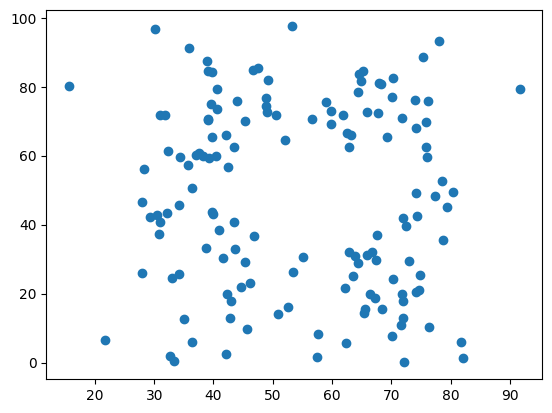

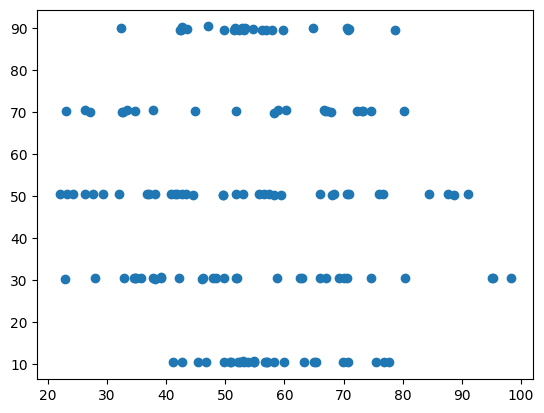

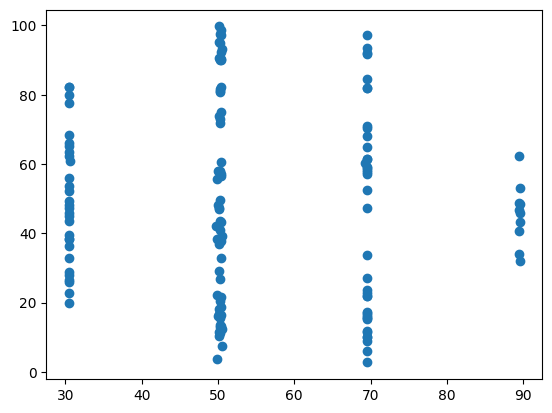

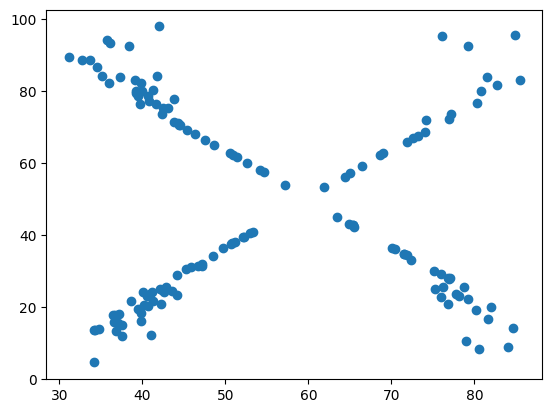

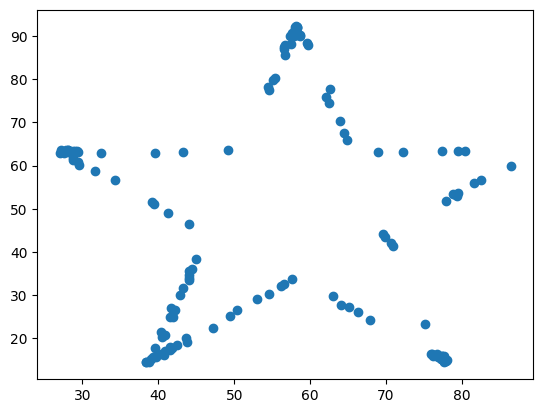

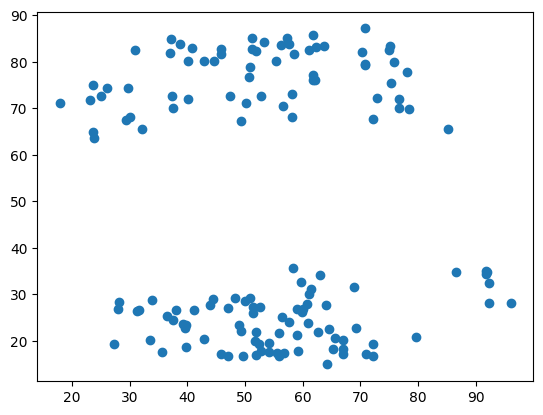

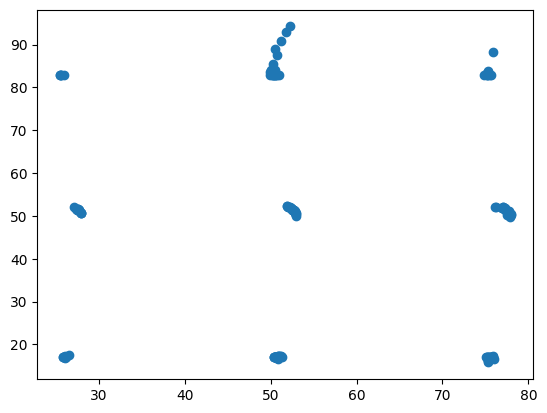

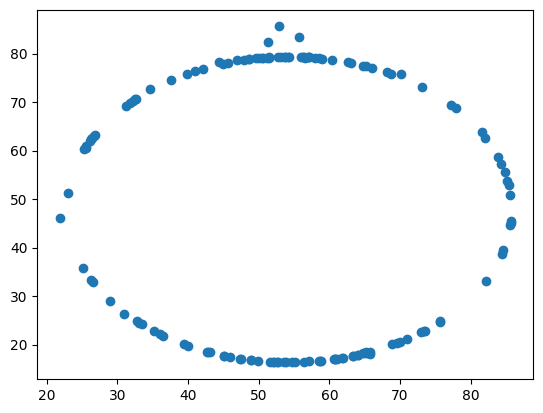

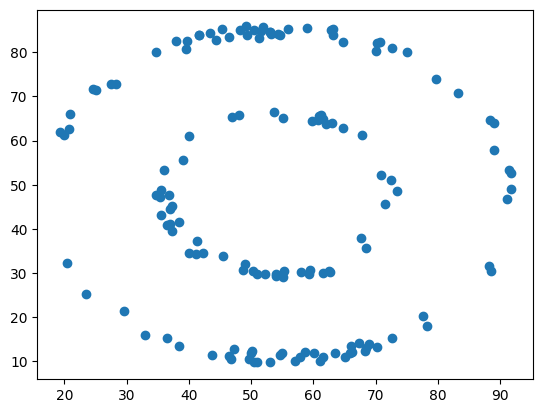

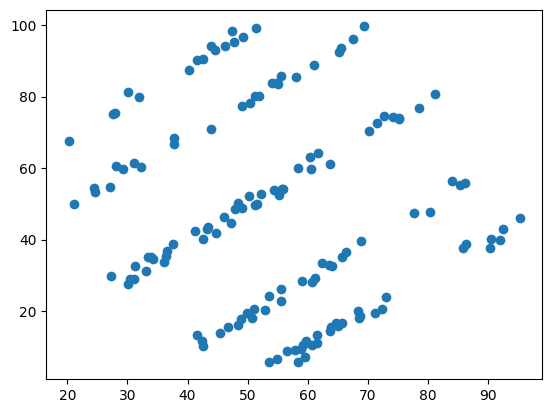

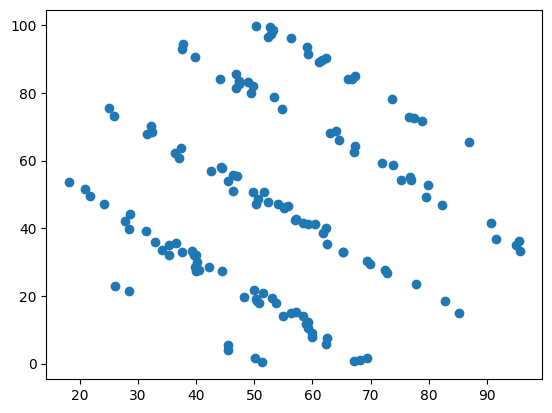

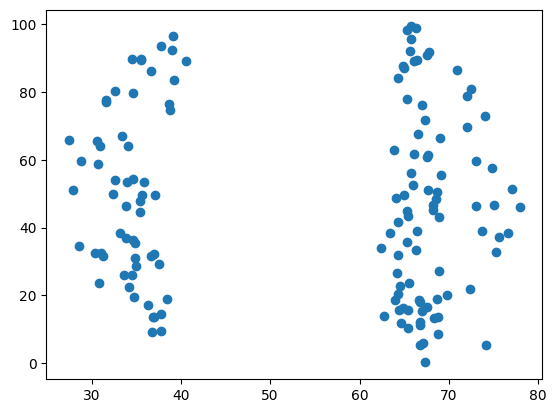

In [6]:
import matplotlib.pyplot as plt
for index in mysterious_df.index.unique():
    if index == "mystery":
        continue
    plt.scatter(mysterious_df.loc[index]["x"], mysterious_df.loc[index]["y"])
    plt.show()

Ja, die Unterschiede sind sehr groß.

(7) Nehmen Sie sich die Folien zur heutigen Vorlesung zur Hand: Benennen Sie nun den Datensatz aus der Vorlesung, bei dem Sie ein ähnliches Phänomen beobachtet haben. (2 Worte)

Anscombe Quartetts

(8) Visualisieren Sie nun den Datensatz **mystery** in einem Scatter-Plot.

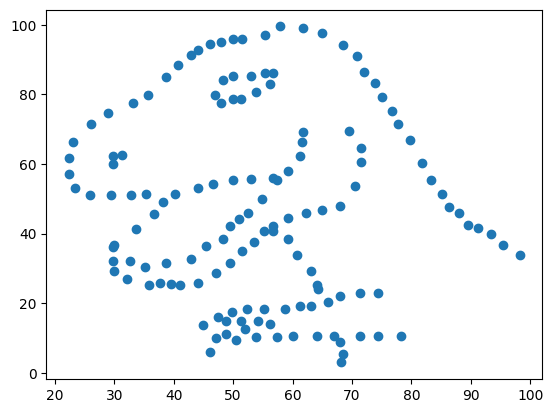

In [7]:
plt.scatter(mysterious_df.loc["mystery"]["x"], mysterious_df.loc["mystery"]["y"])
plt.show()

Damit darf ich Ihnen gratulieren. Sie haben gerade einen bekannten Datensatz kennengelernt. Wenn Sie mit der Übung fertig sind, dekodieren Sie die nachfolgende [ROT13-kodierte Nachricht](http://rot13.de/) und lesen Sie sie:

Uremyvpura Tyüpxjhafpu. Fvr unora fbrora qra "QngnFnhehf" ragqrpxg. Qvrfrf Trfpuöcs fgnzzg hefceüatyvpu iba Nyoregb Pnveb, qre na qre Havirefvgl bs Zvnzv Ivfhryyra Wbheanyvfzhf yrueg, haq gnhpugr mhz refgra Zny va rvarz Gjrrg iba Pnveb nhs: uggcf://gjvggre.pbz/nyoregbpnveb/fgnghf/765167969139765250/cubgb/1

Frvar Zrffntr vfg xyne: Qba'g gehfg fhzznel fgngvfgvpf. Nyjnlf ivfhnyvmr lbhe qngn svefg.

Qre QngnFnhehf ung rf vamjvfpura mh xyrvare Oreüuzgurvg reynatg. Uvagre qrz anpusbytraqra Yvax xöaara Fvr frura, jvr qre Qngrafngm, qra Fvr trenqr nanylfvreg unora, ragfgnaqra vfg: uggcf://jjj.nhgbqrfxerfrnepu.pbz/choyvpngvbaf/fnzrfgngf

Herzlichen Glückwunsch. Sie haben soeben den "DataSaurus" entdeckt. Dieses Geschöpf stammt ursprünglich von Alberto Cairo, der an der University of Miami Visuellen Journalismus lehrt, und tauchte zum ersten Mal in einem Tweet von Cairo auf: https://twitter.com/albertocairo/status/765167969139765250/photo/1

Seine Message ist klar: Don't trust summary statistics. Always visualize your data first.

Der DataSaurus hat es inzwischen zu kleiner Berühmtheit erlangt. Hinter dem nachfolgenden Link können Sie sehen, wie der Datensatz, den Sie gerade analysiert haben, entstanden ist: https://www.autodeskresearch.com/publications/samestats

### 3.2 Visualisierung Teil 1 (Weltgesundheit)

Die Visualisierung von Daten gehört zu den Tätigkeiten, die Sie als Data Scientist sehr häufig ausführen werden. Das Erstellen aussagekräftiger Abbildungen ist zeitintensiv, wird Ihnen aber mit wachsender Übung immer leichter fallen.

In dieser Übung werden Sie einen Datensatz visualisieren und interpretieren, der in den letzten Jahren oft diskutiert wurde. Sie werden untersuchen, wie es um die Gesundheit und den Wohlstand der Weltbevölkerung (zurzeit etwa 7,6 Milliarden Menschen) steht. Die Daten stammen aus unterschiedlichen Quellen und wurden von der gemeinnützigen Gapminder-Stiftung zusammengeführt, die es sich zum Ziel gemacht hat, Menschen mit Statistiken über den Zustand der Welt aufzuklären.

**Ihre Aufgaben**

(1) Führen Sie die unten angeführte Code-Zelle aus, um die Daten zu importieren.

In [8]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


(2) Welche Spalten sind in Ihrem Datensatz enthalten? (kurze Liste der Spalten)

In [9]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

Columns sind: country, contintent, year, lifeExp, pop, gdpPercap 

(3) Machen Sie eine Kurzrecherche und klären Sie für sich: Was ist "GDP"? Was bedeutet "per capita"? (1-2 Sätze)

GDP: Das Bruttoinlandsprodukt ist eine volkswirtschaftliche Kennzahl, die den Gesamtwert aller Waren und Dienstleistungen angibt, die während eines Wirtschaftsjahres innerhalb der Landesgrenzen einer Volkswirtschaft als Endprodukte erwirtschaftet wurden, nach Abzug aller Vorleistungen.

per capita: per capita ist ein lateinischer Ausdruck, der wörtlich „durch Köpfe“ oder „für jeden Kopf“ bedeutet und idiomatisch als „pro Person“ verwendet wird. 

(4) Erstellen Sie eine Abbildung (Scatter-Plot), auf der Sie die Lebenserwartung (y-Achse) gegen GDP per capita (x-Achse) für jedes Land auftragen - *und zwar für das im Datensatz enthaltene neueste Jahr*. Skalieren Sie die x-Achse logarithmisch. Skalieren Sie die Größe der Punkte proportional zur Population des Landes.

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

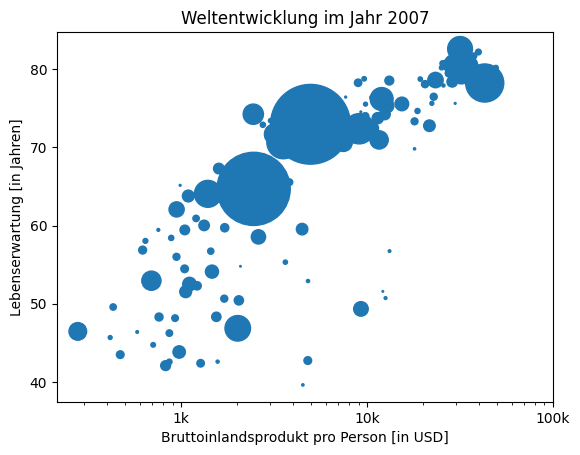

In [10]:
gapminder_max_year = gapminder.loc[gapminder["year"] == gapminder["year"].max()]
plt.scatter(gapminder_max_year["gdpPercap"], gapminder_max_year["lifeExp"], s=gapminder_max_year["pop"] / 4e5)
plt.xscale("log")
plt.xlabel('Bruttoinlandsprodukt pro Person [in USD]')
plt.ylabel('Lebenserwartung [in Jahren]')
plt.title('Weltentwicklung im Jahr 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.show()

(5) Interpretieren Sie Ihre Abbildung. Sehen Sie Zusammenhänge zwischen Lebenserwartung und GDP per Capita? (1-2 Sätze)

Bei der Abbildung kann man sehen, dass der Zusammenhang zwischen Lebenserwartung und GDP existiert. Zwei große Länder in der Mitte sind China und India.

(6) Erweitern Sie Ihre Abbildung aus Schritt (4), in dem Sie die Informationen über die Kontinente integrieren: Identifizieren Sie zunächst die Kontinente, die im Datensatz angeführt werden. Färben Sie die Punkte der Länder gemäß Ihrer Kontinentzugehörigkeit ein.

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

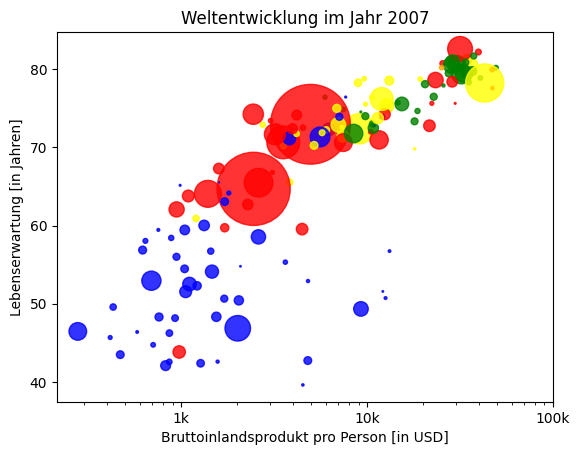

In [11]:
gapminder_max_year = gapminder.loc[gapminder["year"] == gapminder["year"].max()]
colors = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'orange'
}
col = list(colors[x] for x in gapminder_max_year["continent"])
plt.scatter(gapminder_max_year["gdpPercap"], gapminder_max_year["lifeExp"], c=col, s=gapminder_max_year["pop"] / 4e5, alpha=0.8)
plt.xscale("log")
plt.xlabel('Bruttoinlandsprodukt pro Person [in USD]')
plt.ylabel('Lebenserwartung [in Jahren]')
plt.title('Weltentwicklung im Jahr 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.show()

(7) Interpretieren Sie Ihre Abbildung aus Schritt (6). Gibt es Tendenzen bezüglich der Kontinentzugehörigkeit der Länder? Falls ja, welche? (1-3 Sätze).

Ja, man kann jetzt deutlich sehen, dass die Afrikanische Länder haben sowohl ein kleinen GDP, als auch die geringe Lebenserwartung. Andersrum kann man über Europäische Länder sagen, da sie meistens von denen ein höhen GDP und die Lebenserwartung haben.

(8) Erzeugen Sie eine neue Abbildung, die dieselben Informationen wie Ihre Abbildung in Schritt (6) zeigt, nur aus dem Jahr 1967. Vergleichen Sie diese Abbildung mit der aus Schritt (6). Was hat sich verändert und wie interpretieren Sie dies? (1-3 Sätze)

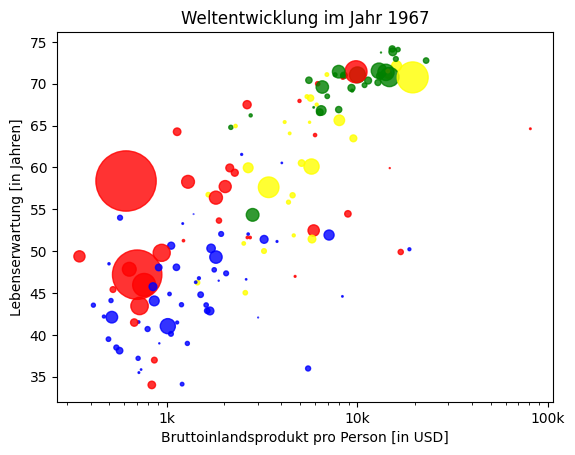

In [12]:
gapminder_max_year = gapminder.loc[gapminder["year"] == 1967]
colors = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'orange'
}
col = list(colors[x] for x in gapminder_max_year["continent"])
plt.scatter(gapminder_max_year["gdpPercap"], gapminder_max_year["lifeExp"], c=col, s=gapminder_max_year["pop"] / 4e5, alpha=0.8)
plt.xscale("log")
plt.xlabel('Bruttoinlandsprodukt pro Person [in USD]')
plt.ylabel('Lebenserwartung [in Jahren]')
plt.title('Weltentwicklung im Jahr 1967')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.show()

In Jahr 1967 haben meisten Asiatischen und Amerikanische Länder sowohl ein geringen GDP, als auch die kurze Lebenserwartung. Die Afrikanische Länder haben im Gegensatz das ähnliche GDP, wie in 2007, nur ist die Population von denen ist erhöht.

(9) \[Optional\] Machen Sie Ihre Abbildung interaktiv. Nutzen Sie die `interact` Funktion, um eine Abbildung zu erzeugen, in der Sie mithilfe eines Reglers das Jahr einstellen können, für das die Abbildung erzeugt werden soll. Wie verändern sich Lebenserwartung und GDP per Capita über die Jahre hinweg? (1-3 Sätze)

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie im Netz und lesen Sie unter anderem [hier](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) nach, wie Sie `interact` nutzen können.

In [13]:
from ipywidgets import interact

def f(x: int) -> int:
    gapminder_max_year = gapminder.loc[gapminder["year"] == x]
    colors = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
    }
    col = list(colors[x] for x in gapminder_max_year["continent"])
    plt.scatter(gapminder_max_year["gdpPercap"], gapminder_max_year["lifeExp"], c=col, s=gapminder_max_year["pop"] / 4e5, alpha=0.8)
    plt.xscale("log")
    plt.xlabel('Bruttoinlandsprodukt pro Person [in USD]')
    plt.ylabel('Lebenserwartung [in Jahren]')
    plt.title('Weltentwicklung im Jahr ' + str(x))
    plt.xticks([1000,10000,100000], ['1k','10k','100k'])
    plt.show()


years = list(gapminder["year"].unique())
year = interact(f, x=years)


interactive(children=(Dropdown(description='x', options=(1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992,…

Die Lebenserwartung und das BIP pro Person haben im Allgemeinen im Laufe der Jahre weltweit verbessert. Länder mit höheren Einkommen pro Kopf tendieren dazu, eine höhere Lebenserwartung zu haben. Dennoch gibt es auch Ausnahmen und unterschiedliche Entwicklungswege in verschiedenen Regionen und Ländern.

### 3.3 Visualisierung Teil 2 (Geburtenraten)

In dieser Aufgabe werden Sie Ihre Fähigkeiten, Daten zu visualisieren, weiter verfeinern. Wir werden uns wieder Daten der Gapminder Stiftung anschauen.

* Da diese Übung an die obere Übung anschließt, gehe ich davon aus, dass Sie nun vertrauter mit der Visualisierung von Daten sind. Daher sind die Anweisungen in dieser Übungsaufgabe etwas freier gehalten.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/child_mortality_0_5_year_olds_dying_per_1000_born.csv) (Datensatz 1) und [hier](https://data.bialonski.de/ds/children_per_woman_total_fertility.csv) (Datensatz 2).

**Randbemerkung**

Im Rahmen dieser Aufgabe wollen wir unter dem Begriff "Geburtenrate" die Gesamtfertilitätsrate (*total fertility rate*) verstehen, wie Sie sie direkt im "Datensatz 2" angegeben finden. Dies ist die durchschnittliche Anzahl von Kindern, die eine gebärfähige Person im Laufe ihres Lebens bekommt. Die Forschung [unterscheidet](https://web.archive.org/web/20220502150023/https://www.gbe-bund.de/gbe/abrechnung.prc_abr_test_logon?p_uid=gast&p_aid=0&p_knoten=FID&p_sprache=D&p_suchstring=12693) allerdings zwischen verschiedenen Fertilitätsindikatoren (z.B. zwischen sogenannten Geburtenziffern, Fertilitätsraten und Reproduktionsraten). Falls Sie also einmal mit einem Bevölkerungswissenschaftler sprechen sollten: Sie untersuchen hier im Rahmen dieser Aufgabe die Gesamtfertilitätsrate.

**Ihre Aufgaben**

(1) Importieren Sie die oben aufgeführten Datensätze.

In [24]:
children_mortality_df = pd.read_csv("child_mortality_0_5_year_olds_dying_per_1000_born.csv", index_col=0)
children_per_woman_df = pd.read_csv("children_per_woman_total_fertility.csv", index_col=0)

<bound method DataFrame.info of               1800   1801   1802   1803   1804   1805   1806   1807   1808  \
country                                                                      
Afghanistan  469.0  469.0  469.0  469.0  469.0  469.0  470.0  470.0  470.0   
Albania      375.0  375.0  375.0  375.0  375.0  375.0  375.0  375.0  375.0   
Algeria      460.0  460.0  460.0  460.0  460.0  460.0  460.0  460.0  460.0   
Andorra        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Angola       486.0  486.0  486.0  486.0  486.0  486.0  486.0  486.0  486.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
Venezuela    415.0  415.0  415.0  415.0  415.0  415.0  415.0  415.0  415.0   
Vietnam      417.0  417.0  417.0  417.0  417.0  417.0  417.0  417.0  417.0   
Yemen        540.0  540.0  540.0  540.0  540.0  540.0  540.0  540.0  540.0   
Zambia       410.0  410.0  410.0  410.0  410.0  410.0  410.0  410.0  410.0   
Zimbabwe     396.0  396.0  396.0

<bound method DataFrame.info of                      1800  1801  1802  1803  1804  1805  1806  1807  1808  \
country                                                                     
Afghanistan          7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Albania              4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria              6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
Angola               6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94  6.94   
Antigua and Barbuda  5.00  5.00  4.99  4.99  4.99  4.98  4.98  4.97  4.97   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela            5.63  5.63  5.64  5.64  5.64  5.65  5.65  5.65  5.66   
Vietnam              4.70  4.70  4.70  4.70  4.70  4.70  4.70  4.70  4.70   
Yemen                6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88   
Zambia               6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71   
Zimbabwe             6.75  6.75  6.75  6.75 

(2) Interpretieren Sie die Dateinamen und schauen Sie in die Datensätze: Was enthalten Ihre Datensätze für Daten?

`child_mortality_0_5_year_old_dying_per_1000_born.csv` hat ein Datensatz mit Ländern als Zeilen und Jahren als Spalten. Jede Zeile hat die Bedeutung - Mortalität der Kinder von 0 bis 5 Jahren alt pro 1000 neugeborenes in einem Land.

`children_per_woman_total_fertility.csv` hat ein Datensatz mit Ländern als Zeilen und jahren als Spalten. Jede Zeile hat die Bedeutung - die Anzahl von Kindern pro Frau in einem Land.

(3) Erstellen Sie die erste Abbildung: Tragen Sie in einem Scatter-Plot die Kind-Überlebensrate (in Prozent) (y-Achse) gegen die Kinder pro gebärfähiger Person (x-Achse) für jedes aufgeführte Land für das Jahr 1962 ein.

ValueError: x and y must be the same size

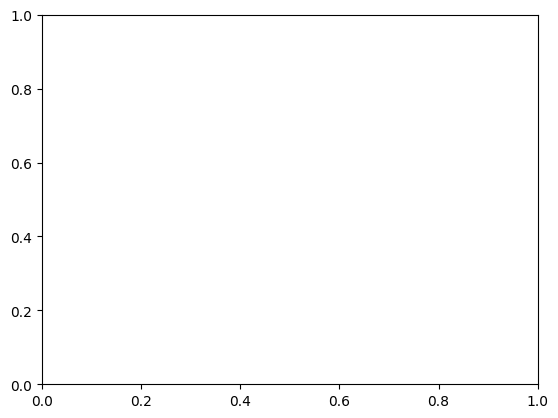

In [22]:
children_per_woman_1962 = children_per_woman_df.loc[:, "1962"]
children_mortality_df_1962 = (1000 - np.array(children_mortality_df.loc[:, "1962"])) * 100

plt.scatter(x=children_per_woman_1962, y=children_mortality_df_1962,)

(4) Erweitern Sie die Abbildung aus Schritt (3), indem Sie die Punkte des Scatterplots proportional zur Populationsgröße des jeweiligen Landes skalieren. Dazu werden Sie Informationen aus Übung 3.2 verwenden müssen.

(5) Interpretieren Sie die Abbildung aus Schritt (4). Können Sie verschiedene Cluster von Ländern erkennen? (1-5 Sätze)

(6) Erstellen Sie eine weitere Abbildung wie in Schritt (4), allerdings für das Jahr 2007.

(7) Vergleichen Sie Ihre Abbildungen aus Schritt (4) und Schritt (6): Wie haben sich die Daten verändert? Können Sie für das Jahr 2007 weiterhin Cluster erkennen? (1-5 Sätze)

(8) Ziehen Sie ein Fazit: Beschreiben Sie in wenigen Sätzen, was Sie aus den beiden Abbildungen lernen.

### 3.4 Visualisierung Teil 3

Sie haben in den letzten beiden Aufgaben Daten der Gapminder Stiftung visualisiert. In dieser Aufgabe geht es darum, Daten selbstständig zu analysieren, zu visualisieren und Ihre Erkenntnisse aufzubereiten.

**Ihre Aufgaben**

(1) Sofern noch nicht geschehen: Tun Sie sich mit einem Kollegen/einer Kollegin zusammen.

(2) Testen Sie Ihr Vorwissen: Absolvieren Sie gemeinsam den Test der Gapminder-Stiftung, der [hier](https://upgrader.gapminder.org/t/2017-gapminder-test) hinterlegt ist. Wieviele der Fragen konnten Sie richtig beantworten?

(3) Stöbern Sie gemeinsam in den Datenquellen der Gapminder Stiftung unter [https://www.gapminder.org/data/](https://www.gapminder.org/data/). (Scrollen Sie auf der verlinkten Seite weiter nach unten, um die Datensammlung zu sehen: "List of indicators in Gapminder Tools").

(4) Identifizieren Sie Datensätze, die Sie interessant finden. Führen Sie eine explorative Analyse durch, d.h. laden und importieren Sie die Daten, stellen Sie Fragen auf, und erstellen Sie entsprechende Visualisierungen, interpretieren Sie Ihre Befunde.

(5) Dokumentieren Sie Ihre explorative Analyse in diesem Jupyter Notebook und reichen Sie es bei ILIAS als Teamabgabe ein.
